In [57]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import sigmoid
from scikeras.wrappers import KerasRegressor
from scikeras.wrappers import KerasClassifier

# Load the dataset
data = pd.read_excel('Energy_data.xlsx')


In [58]:
#pip install scikeras

**Data Preprocessing**

In [59]:
# Check for missing values
print(data.isnull().sum())

Date                       0
Energy_demand(mw)          0
Population_fed             0
Location                   0
Grid_energy(mwh)           0
Supply_availability(hr)    0
Energy_demand              0
Grid_energy                0
Day                        0
Month                      0
Year                       0
Ogun_Gdp                   0
dtype: int64


In [60]:
data.dropna(inplace=True)

In [61]:
data

,Date,Energy_demand(mw),Population_fed,Location,Grid_energy(mwh),Supply_availability(hr),Energy_demand,Grid_energy,Day,Month,Year,Ogun_Gdp
0,2015-01-15,12.0,161483,Ikenne,2307,506,12000000.0,2307000000,Thursday,January,2015,220.75
1,2015-02-01,12.0,161934,Ikenne,2108,512,12000000.0,2108000000,Sunday,February,2015,160.75
2,2015-03-01,10.0,162387,Ikenne,1987,476,10000000.0,1987000000,Sunday,March,2015,104.77
3,2015-04-01,13.0,162841,Ikenne,2687,489,13000000.0,2687000000,Wednesday,April,2015,156.86
4,2015-05-01,10.0,163296,Ikenne,2398,387,10000000.0,2398000000,Friday,May,2015,167.32
...,...,...,...,...,...,...,...,...,...,...,...,...
295,2019-08-01,10.0,404463,Phoenix,3592,618,10000000.0,3592000000,Thursday,August,2019,433.35
296,2019-09-01,10.3,405594,Phoenix,2850,487,10300000.0,2850000000,Sunday,September,2019,461.23
297,2019-10-01,10.0,406728,Phoenix,3255,567,10000000.0,3255000000,Tuesday,October,2019,454.84
298,2019-11-01,12.0,407865,Phoenix,2613,451,12000000.0,2613000000,Friday,November,2019,425.37


In [62]:
# sort by date & time
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'], axis=0, ascending=True, inplace=True)
data.reset_index(inplace=True, drop=True)

In [63]:
data

,Date,Energy_demand(mw),Population_fed,Location,Grid_energy(mwh),Supply_availability(hr),Energy_demand,Grid_energy,Day,Month,Year,Ogun_Gdp
0,2015-01-15,12.0,161483,Ikenne,2307,506,12000000.0,2307000000,Thursday,January,2015,220.75
1,2015-01-15,12.5,346894,Nnpc_Ogijo,4203,623,12500000.0,4203000000,Thursday,January,2015,220.75
2,2015-01-15,11.3,318678,Owode_Egba,1261,402,11300000.0,1261000000,Thursday,January,2015,220.75
3,2015-01-15,12.0,346894,Sagamu,3873,601,12000000.0,3873000000,Thursday,January,2015,220.75
4,2015-01-15,17.0,346894,Phoenix,887,632,17000000.0,887000000,Thursday,January,2015,220.75
...,...,...,...,...,...,...,...,...,...,...,...,...
295,2019-12-01,17.0,409005,Nnpc_Ogijo,3282,643,17000000.0,3282000000,Sunday,December,2019,484.31
296,2019-12-01,12.0,409005,Sagamu,3753,550,12000000.0,3753000000,Sunday,December,2019,484.31
297,2019-12-01,12.0,190396,Ikenne,2602,416,12000000.0,2602000000,Sunday,December,2019,484.31
298,2019-12-01,11.0,375737,Owode_Egba,2162,341,11000000.0,2162000000,Sunday,December,2019,484.31


In [64]:
# Drop unnecessary columns
data.drop([ "Month", "Date" , 'Grid_energy(mwh)', 'Energy_demand(mw)'], axis=1, inplace=True)

#"Day", "Year", 'Date'

In [65]:
# Adding new columns
data["Grid_efficiency"] = data["Energy_demand"] / data["Grid_energy"]

In [66]:
# 2. Handling categorical variables: Day of the Week
# One-hot encode the 'Day' and Location columns
data = pd.get_dummies(data, columns=['Day'])
data = pd.get_dummies(data, columns=['Location'])

In [67]:
data

,Population_fed,Supply_availability(hr),Energy_demand,Grid_energy,Year,Ogun_Gdp,Grid_efficiency,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Location_Ikenne,Location_Nnpc_Ogijo,Location_Owode_Egba,Location_Phoenix,Location_Sagamu
0,161483,506,12000000.0,2307000000,2015,220.75,0.005202,False,False,False,False,True,False,False,True,False,False,False,False
1,346894,623,12500000.0,4203000000,2015,220.75,0.002974,False,False,False,False,True,False,False,False,True,False,False,False
2,318678,402,11300000.0,1261000000,2015,220.75,0.008961,False,False,False,False,True,False,False,False,False,True,False,False
3,346894,601,12000000.0,3873000000,2015,220.75,0.003098,False,False,False,False,True,False,False,False,False,False,False,True
4,346894,632,17000000.0,887000000,2015,220.75,0.019166,False,False,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,409005,643,17000000.0,3282000000,2019,484.31,0.005180,False,False,False,True,False,False,False,False,True,False,False,False
296,409005,550,12000000.0,3753000000,2019,484.31,0.003197,False,False,False,True,False,False,False,False,False,False,False,True
297,190396,416,12000000.0,2602000000,2019,484.31,0.004612,False,False,False,True,False,False,False,True,False,False,False,False
298,375737,341,11000000.0,2162000000,2019,484.31,0.005088,False,False,False,True,False,False,False,False,False,True,False,False


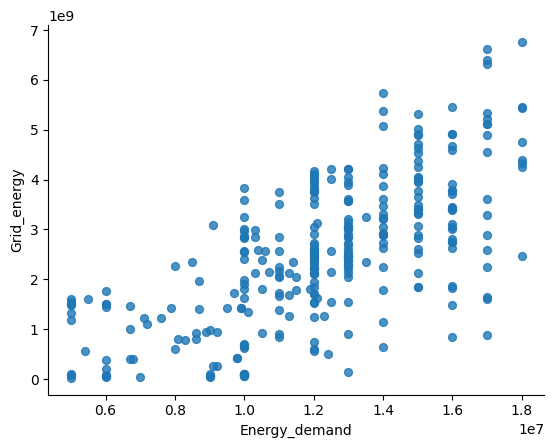

In [68]:
from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Energy_demand', y='Grid_energy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

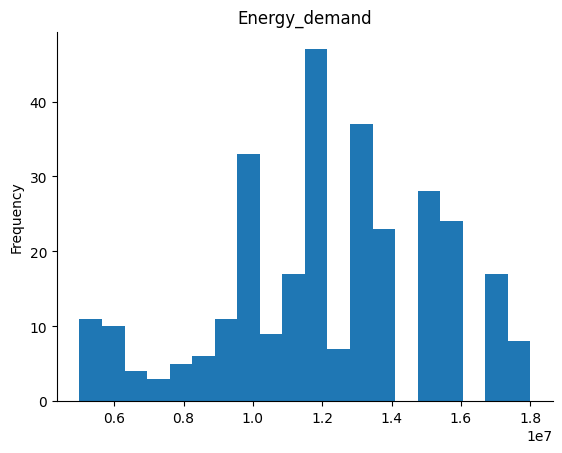

In [70]:
from matplotlib import pyplot as plt
data['Energy_demand'].plot(kind='hist', bins=20, title='Energy_demand')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [71]:
print(data.describe())

       Population_fed  Supply_availability(hr)  Energy_demand   Grid_energy  \
count      300.000000                300.00000   3.000000e+02  3.000000e+02   
mean    331534.440000                491.13000   1.218667e+07  2.504713e+09   
std      80800.931316                117.64839   3.144080e+06  1.444876e+09   
min     161483.000000                192.00000   5.000000e+06  2.400000e+07   
25%     333933.250000                406.00000   1.000000e+07  1.504750e+09   
50%     362549.500000                507.50000   1.200000e+07  2.461000e+09   
75%     382500.000000                600.25000   1.500000e+07  3.470250e+09   
max     436875.000000                733.00000   1.800000e+07  6.762000e+09   

              Year    Ogun_Gdp  Grid_efficiency  
count   300.000000  300.000000       300.000000  
mean   2017.000000  254.008000         0.014338  
std       1.416576   93.703026         0.032181  
min    2015.000000  104.770000         0.002443  
25%    2016.000000  181.747500        

In [72]:
# Normalizing the features
# This step ensures that all features have similar scales, which can improve the performance of the model
numeric_columns = data.select_dtypes(include=['number'])
# Min-Max scaling to normalize numeric columns
normalized_data = (numeric_columns - numeric_columns.min()) / (numeric_columns.max() - numeric_columns.min())

In [73]:
# Separate numeric and non-numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = data.select_dtypes(exclude=['float64', 'int64']).columns

In [74]:
data

,Population_fed,Supply_availability(hr),Energy_demand,Grid_energy,Year,Ogun_Gdp,Grid_efficiency,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,Location_Ikenne,Location_Nnpc_Ogijo,Location_Owode_Egba,Location_Phoenix,Location_Sagamu
0,161483,506,12000000.0,2307000000,2015,220.75,0.005202,False,False,False,False,True,False,False,True,False,False,False,False
1,346894,623,12500000.0,4203000000,2015,220.75,0.002974,False,False,False,False,True,False,False,False,True,False,False,False
2,318678,402,11300000.0,1261000000,2015,220.75,0.008961,False,False,False,False,True,False,False,False,False,True,False,False
3,346894,601,12000000.0,3873000000,2015,220.75,0.003098,False,False,False,False,True,False,False,False,False,False,False,True
4,346894,632,17000000.0,887000000,2015,220.75,0.019166,False,False,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,409005,643,17000000.0,3282000000,2019,484.31,0.005180,False,False,False,True,False,False,False,False,True,False,False,False
296,409005,550,12000000.0,3753000000,2019,484.31,0.003197,False,False,False,True,False,False,False,False,False,False,False,True
297,190396,416,12000000.0,2602000000,2019,484.31,0.004612,False,False,False,True,False,False,False,True,False,False,False,False
298,375737,341,11000000.0,2162000000,2019,484.31,0.005088,False,False,False,True,False,False,False,False,False,True,False,False


In [75]:
scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [76]:
import tensorflow as tf
from tensorflow import keras

In [77]:
# Split the dataset into features and target variable
from sklearn.model_selection import train_test_split
X = data.drop("Energy_demand", axis=1)
y = data["Energy_demand"]

In [78]:
# Perform temporal split for monthly data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
print(X_train.shape)


(240, 18)


In [81]:
X_train

array([[ 0.77979956,  0.35905434,  0.86574456, ..., -0.5       ,
        -0.5       ,  2.        ],
       [-2.07110961, -0.26331586,  0.21082769, ..., -0.5       ,
        -0.5       , -0.5       ],
       [ 0.1973314 ,  1.04870781,  1.09110698, ..., -0.5       ,
        -0.5       , -0.5       ],
       ...,
       [ 0.0729296 , -1.47441463, -1.07100648, ...,  2.        ,
        -0.5       , -0.5       ],
       [ 0.89122955,  0.36746475,  0.62057755, ..., -0.5       ,
        -0.5       , -0.5       ],
       [ 0.06114614, -1.52487708, -0.88047279, ...,  2.        ,
        -0.5       , -0.5       ]])

In [82]:
y

0      0.538462
1      0.576923
2      0.484615
3      0.538462
4      0.923077
         ...   
295    0.923077
296    0.538462
297    0.538462
298    0.461538
299    0.461538
Name: Energy_demand, Length: 300, dtype: float64

In [83]:
# BUILDING ANN ARCHITECTURE

from tensorflow.keras.initializers import RandomNormal
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout

# Define the create_model function with randomized weights

# Define the number of neurons in each layer
num_features = 18

# Define the create_model function
def create_model(dropout_rate=0.4, optimizer='adam'):
    model = Sequential()
    model.add(Dense(13, activation='sigmoid', input_shape=(num_features,)))
    model.add(Dropout(dropout_rate))  # Adding dropout to prevent overfitting
    model.add(Dense(7, activation='sigmoid'))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae', 'mse', 'mape'])
    return model

# Create the model
model = create_model()

# Display model summary
print(model.summary())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 13)                  │             247 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 7)                   │              98 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               8 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 353 (1.38 KB)

 Trainable params: 353 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

None


In [84]:
#Early stopping
import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose= 1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,

)

In [85]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks = early_stopping)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.4593 - mae: 0.6186 - mape: 6460082.0000 - mse: 0.4593 - val_loss: 0.3634 - val_mae: 0.5398 - val_mape: 99.9251 - val_mse: 0.3634
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.3805 - mae: 0.5509 - mape: 3937907.2500 - mse: 0.3805 - val_loss: 0.3103 - val_mae: 0.4911 - val_mape: 86.2619 - val_mse: 0.3103
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3305 - mae: 0.5094 - mape: 5377974.5000 - mse: 0.3305 - val_loss: 0.2626 - val_mae: 0.4466 - val_mape: 81.1941 - val_mse: 0.2626
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2915 - mae: 0.4765 - mape: 6004747.5000 - mse: 0.2915 - val_loss: 0.2206 - val_mae: 0.4035 - val_mape: 76.9676 - val_mse: 0.2206
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2410 - mae: 0.4337 - mape: 12054202.0000 - mse: 0.2410 - val_loss: 0.1848 - val_mae: 0.3667 - val_mape: 76.0410 - val_mse: 0.1848
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 

In [86]:
# Evaluate the model
# Calculate R-squared
from sklearn.metrics import r2_score
test_loss, test_mae, test_mse, test_mape = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2}')
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')
print(f'Test MSE: {test_mse}')
print(f'Test MAPE: {test_mape}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0255 - mae: 0.1215 - mape: 34.1346 - mse: 0.0255 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
R-squared (R2): 0.45452795401093427
Test Loss: 0.025973794981837273
Test MAE: 0.12459173798561096
Test MSE: 0.025973794981837273
Test MAPE: 31.753347396850586


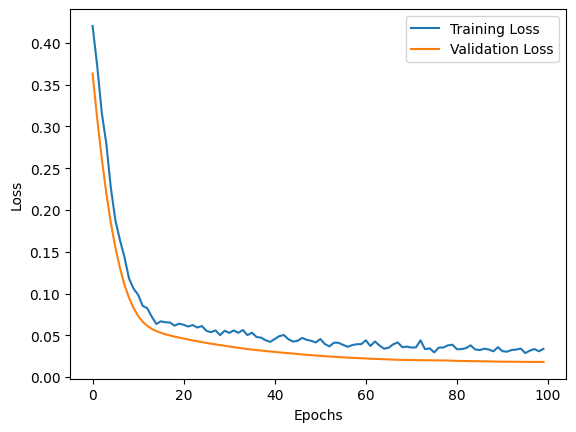

In [87]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [88]:
# Get the weights and biases of each layer
for layer in model.layers:
    # Check if the layer has weights
    if layer.weights:
        weights, biases = layer.get_weights()
        print(f"Weights of {layer.name}: {weights.shape}")
        print(f"Biases of {layer.name}: {biases.shape}")
    else:
        print(f"No weights for {layer.name}")


Weights of dense_6: (18, 13)
Biases of dense_6: (13,)
No weights for dropout_2
Weights of dense_7: (13, 7)
Biases of dense_7: (7,)
Weights of dense_8: (7, 1)
Biases of dense_8: (1,)


In [90]:
import numpy as np

# Define sample input values (18 features)
sample_input = np.array([[0.538462, 0.576923] + [np.random.rand() for _ in range(16)]])

# Perform forward propagation
activations = sample_input
for layer in model.layers:
    if isinstance(layer, Dense):
        activations = layer(activations)

print(f"Output of the model for the given input: {activations.numpy()}")


Output of the model for the given input: [[0.6197119]]


In [178]:
# Get the number of layers
num_layers = len(model.layers)

# Loop through all layers
for i in range(num_layers):
  layer = model.layers[i]

  # Check if layer has weights (skip dropout layers)
  if hasattr(layer, 'get_weights'):
    try:
      weights, biases = layer.get_weights()
      print(f"Layer_{i+1}_Weights:")
      print(weights)
      print(f"Layer_{i+1}_Biases:")
      print(biases)
    except ValueError:
      print(f"Layer {i+1}: (No weights or biases)")
  else:
    print(f"Layer {i+1}: (Dropout layer, no weights or biases)")


Layer_1_Weights:
[[ 2.04058647e-01  5.09718359e-01  9.74393338e-02 -2.72461295e-01
  -2.34613001e-01  1.07678600e-01 -3.25345248e-01  2.02756241e-01
   2.91011363e-01 -2.05736116e-01 -2.14415804e-01  1.93601996e-01
  -4.38320190e-01]
 [ 4.49182354e-02  1.52996667e-02 -1.99817151e-01  6.72643888e-04
   1.69642810e-02 -5.02633564e-02 -1.66326806e-01 -2.43093804e-01
   1.01454392e-01  1.07100546e-01 -7.78723806e-02  1.17203370e-01
   5.16057089e-02]
 [-5.14420152e-01 -3.98361206e-01  7.95352086e-03  1.10501863e-01
  -6.90338433e-01 -7.12351650e-02  3.19548696e-01  1.05177410e-01
   2.53602773e-01 -4.68895733e-01  4.60568637e-01 -1.54852897e-01
   4.85305279e-01]
 [ 1.12339571e-01  6.43547326e-02 -1.55592680e-01  2.50937250e-02
  -2.49264807e-01 -1.80497289e-01 -4.17817920e-01 -1.47281557e-01
   1.94313705e-01 -3.08755338e-01  1.60397291e-01 -2.99074352e-02
   1.27560452e-01]
 [-1.89267062e-02 -1.70789570e-01  5.06777823e-01  2.52456009e-01
   2.22327918e-01  5.36909439e-02  4.54414606e-01

In [179]:
num_layers = len(model.layers)  # Get the number of layers

# Create an empty dictionary to store layers with weights/biases
layer_data = {}

# Loop through all layers
for i in range(num_layers):
  layer = model.layers[i]
  layer_data[f"layer_{i+1}"] = layer  # Store layer by name (optional)

  # Check if layer has weights (skip dropout layers)
  if hasattr(layer, 'get_weights'):
    try:
      weights, biases = layer.get_weights()
      layer_data[f"layer_{i+1}_weights"] = weights
      layer_data[f"layer_{i+1}_biases"] = biases
    except ValueError:
      layer_data[f"layer_{i+1}_weights"] = None
      layer_data[f"layer_{i+1}_biases"] = None
  else:
    layer_data[f"layer_{i+1}_weights"] = None
    layer_data[f"layer_{i+1}_biases"] = None

# Now you can access layers and their weights/biases for calculations
first_layer_weights = layer_data["layer_1_weights"]
specific_layer_biases = layer_data["layer_4_biases"]

# Perform calculations using weights and biases
# ... your calculations here ...

print(f"Shape of weights for first layer: {first_layer_weights.shape}")
print(f"Specific layer biases: {specific_layer_biases}")


Shape of weights for first layer: (18, 13)
Specific layer biases: [0.0693696]


In [180]:
layer_data

{'layer_1': <Dense name=dense_6, built=True>,
 'layer_1_weights': array([[ 2.04058647e-01,  5.09718359e-01,  9.74393338e-02,
         -2.72461295e-01, -2.34613001e-01,  1.07678600e-01,
         -3.25345248e-01,  2.02756241e-01,  2.91011363e-01,
         -2.05736116e-01, -2.14415804e-01,  1.93601996e-01,
         -4.38320190e-01],
        [ 4.49182354e-02,  1.52996667e-02, -1.99817151e-01,
          6.72643888e-04,  1.69642810e-02, -5.02633564e-02,
         -1.66326806e-01, -2.43093804e-01,  1.01454392e-01,
          1.07100546e-01, -7.78723806e-02,  1.17203370e-01,
          5.16057089e-02],
        [-5.14420152e-01, -3.98361206e-01,  7.95352086e-03,
          1.10501863e-01, -6.90338433e-01, -7.12351650e-02,
          3.19548696e-01,  1.05177410e-01,  2.53602773e-01,
         -4.68895733e-01,  4.60568637e-01, -1.54852897e-01,
          4.85305279e-01],
        [ 1.12339571e-01,  6.43547326e-02, -1.55592680e-01,
          2.50937250e-02, -2.49264807e-01, -1.80497289e-01,
         -4.17

In [181]:
layer_data["layer_1_weights"]

array([[ 2.04058647e-01,  5.09718359e-01,  9.74393338e-02,
        -2.72461295e-01, -2.34613001e-01,  1.07678600e-01,
        -3.25345248e-01,  2.02756241e-01,  2.91011363e-01,
        -2.05736116e-01, -2.14415804e-01,  1.93601996e-01,
        -4.38320190e-01],
       [ 4.49182354e-02,  1.52996667e-02, -1.99817151e-01,
         6.72643888e-04,  1.69642810e-02, -5.02633564e-02,
        -1.66326806e-01, -2.43093804e-01,  1.01454392e-01,
         1.07100546e-01, -7.78723806e-02,  1.17203370e-01,
         5.16057089e-02],
       [-5.14420152e-01, -3.98361206e-01,  7.95352086e-03,
         1.10501863e-01, -6.90338433e-01, -7.12351650e-02,
         3.19548696e-01,  1.05177410e-01,  2.53602773e-01,
        -4.68895733e-01,  4.60568637e-01, -1.54852897e-01,
         4.85305279e-01],
       [ 1.12339571e-01,  6.43547326e-02, -1.55592680e-01,
         2.50937250e-02, -2.49264807e-01, -1.80497289e-01,
        -4.17817920e-01, -1.47281557e-01,  1.94313705e-01,
        -3.08755338e-01,  1.60397291e

FEED FORWARD CALCULATIONS

In [182]:
# First_layer_weights is a list containing the weights row by row
first_layer_weights_reshaped = np.array(layer_data["layer_1_weights"]).reshape(18, 13)

# Now let's use first_layer_weights_reshaped in the calculation
weighted_sum1 = np.dot(sample_input, first_layer_weights_reshaped)

weighted_sum1

array([[ 0.31257348,  0.25972051,  0.45910944, -0.91500147, -1.34301692,
         0.3065606 ,  0.84169983, -0.11084613,  0.07459978, -1.08769404,
        -0.75755298,  0.88138536, -0.51141702]])

In [183]:
# First_layer_biases is a list containing the biases
First_layer_biases = np.array(layer_data["layer_1_biases"] )

First_layer_biases

array([-0.08894999, -0.097227  ,  0.002545  , -0.12278894, -0.05801789,
       -0.06892472,  0.00290357, -0.02287105, -0.00745481, -0.13067017,
        0.00882413, -0.09386865, -0.09804293], dtype=float32)

In [184]:
z1 = weighted_sum1 + layer_data["layer_1_biases"]
activations1 = 1 / (1 + np.exp(-z1))  # Apply activation function (sigmoid)
print(z1)
print(activations1)

[[ 0.22362349  0.16249351  0.46165444 -1.0377904  -1.40103481  0.23763589
   0.8446034  -0.13371718  0.06714497 -1.21836422 -0.74872885  0.78751671
  -0.60945994]]
[[0.55567405 0.54053423 0.61340658 0.26157656 0.19765195 0.55913097
  0.69943386 0.46662043 0.51677994 0.22822445 0.32109834 0.68729787
  0.3521824 ]]


**Dropout Functionality:**

- Dropout layers are regularization techniques used to prevent neural networks from overfitting on training data.
- During training, dropout layers randomly drop a certain percentage of neurons (units) from the activation process, essentially setting their outputs to zero for that forward pass.
- This forces the network to learn features that are not dependent on any specific neuron, promoting robustness and generalizability.

In [185]:
# Third_layer_weights is a list containing the weights row by row
Third_layer_weights_reshaped = np.array(layer_data["layer_3_weights"]).reshape(13, 7)
# Activations1 is the output from the first layer
weighted_sum3 = np.dot(activations1, Third_layer_weights_reshaped)

weighted_sum3

array([[-0.15748928, -1.04404967, -0.34190458, -0.39753338,  0.81423874,
         0.04575968, -0.39069044]])

In [186]:
# Third_layer_biases is a list containing the biases
Third_layer_biases = np.array(layer_data["layer_3_biases"] )

Third_layer_biases

array([ 0.0767056 , -0.06732444, -0.06670982,  0.07907384,  0.07784263,
       -0.07029251,  0.08459645], dtype=float32)

In [187]:
z3 = weighted_sum3 + layer_data["layer_3_biases"]  # Add biases
activations3 = 1 / (1 + np.exp(-z2))  # Apply activation function (sigmoid)
print(z3)
print(activations3)

[[-0.08078368 -1.11137412 -0.40861439 -0.31845954  0.89208137 -0.02453283
  -0.306094  ]]
[[0.47981506 0.2476148  0.39924441 0.42105122 0.70931951 0.4938671
  0.42406844]]


In [189]:
weighted_sum4 = np.dot(activations3, output_layer_weights)

z3 = weighted_sum3 + output_layer_bias

output = z3  # Directly use the weighted sum for output

print(output)

[[-0.08811968 -0.97468007 -0.27253498 -0.32816378  0.88360834  0.11512928
  -0.32132084]]


**NOTE**: Regression problems (continuous output): Typically don't use an activation function in the output layer, as the network aims to predict a real number directly. Thus, In the output layer calculation, the line output = 1 / (1 + np.exp(-z3)) has been removed. This eliminates the sigmoid activation function in the final step.
The output is now directly assigned the value of z3, which represents the weighted sum of the activations from the second layer and the output layer bias.
Remember to update the placeholders with your actual data and weight values. This code should provide the raw output of the network without applying an activation function in the final layer.

In [190]:
# Output Layer (No activation function)
output_layer_weights = np.array(layer_data["layer_4_weights"]).reshape(7, 1)

output_layer_bias = np.array(layer_data["layer_4_biases"])

print(output_layer_weights)
print(output_layer_bias)

[[ 0.26475367]
 [-0.24237525]
 [-0.23625718]
 [ 0.67641276]
 [ 0.6266055 ]
 [-0.5544375 ]
 [ 0.2034134 ]]
[0.0693696]


FORECASTING ENERGY DEMAND FOR TEN (10) YEARS

In [ ]:
# Take the last row of X_test as the starting point for projection
X_project = X_test[-1:]# 

# Initialize an empty list to store projected energy demand
projected_energy_demand = []

In [ ]:
# Project for ten years (120 months)
for _ in range(120):
    # Predict energy demand for the next month
    next_demand = model.predict(X_project)

    # Append the predicted demand to the list
    projected_energy_demand.append(next_demand[0][0])

    # Update X_project with the predicted demand for the next iteration
    X_project = np.concatenate((X_project[:, 1:], next_demand), axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

In [ ]:
# Convert the projected energy demand to a DataFrame
projected_data= pd.DataFrame(projected_energy_demand, columns=["Projected_Energy_Demand"])

# Print the first few rows of the projected DataFrame
print(projected_data.head(25))

    Projected_Energy_Demand
0                  0.588930
1                  0.298430
2                  0.294531
3                  0.696651
4                  0.621882
5                  0.676001
6                  0.584876
7                  0.435007
8                  0.530276
9                  0.557515
10                 0.561434
11                 0.566859
12                 0.546514
13                 0.571841
14                 0.572585
15                 0.715559
16                 0.670756
17                 0.527687
18                 0.572500
19                 0.630978
20                 0.638275
21                 0.603576
22                 0.601973
23                 0.596786
24                 0.602990
